In [ ]:
'''
Project Subject: Imbalanced Data : How to handle Imbalanced Classification Problems
Imbalanced class distribution is a scenario where the number of observations belonging to one class is significantly lower than those belonging to the other classes.
Most machine learning algorithms work best when the number of samples in each class are about equal. This is because most algorithms are designed to maximize accuracy and reduce errors and they do not take into account the class distribution or balance of classes, so 
Class Imbalance is a common problem in machine learning, especially in classification problems. Imbalance data can hamper our model accuracy big time.
In this article, we will see different techniques to handle the imbalanced data.
1)Resampling Technique
2)SMOTE
3)A combination of under- and oversampling method using pipeline
4)NearMiss
'''

In [22]:
#Import Library
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import scorer, accuracy_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split

from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#Connecting to google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
cd'/content/gdrive/MyDrive/Colab Notebooks/CSV Files'

/content/gdrive/MyDrive/Colab Notebooks/CSV Files


In [ ]:
'''
Identifying fraudulent credit card transactions is a common type of imbalanced binary classification where the focus is on the positive class (is fraud) class. In this study, we will use a credit card fraud detection dataset which is standard imbalanced machine learning dataset.
The details of the dataset are as follows:
Features V1 - V28 are a result of the PCA transformation and are simply numerical representations.
Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. 
The feature 'Amount' is the transaction Amount, this feature can be used for example-dependent cost-sensitive learning. 
The 'Time' column is unlikely to be useful and probably can be removed. The difference in scale between the PCA variables and the dollar 'Amount' suggests 
that data scaling should be used for those algorithms that are sensitive to the scale of input variables. The only features which have not been transformed are ‘Time’ and ‘Amount’.
Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise. 
Dataset contains a subset of online transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, where the positive class (frauds) account for 0.172% of all transactions.
We have totally 31 variables in this dataset.
Number of total instances: 284807'''

In [23]:
#load dataset
data = pd.read_csv('creditcard_csv (1).csv')

#Shows 5 rows × 32 columns
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,'0'
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,'0'
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,'0'
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,'0'
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,'0'


In [24]:
data.shape
data.Class.value_counts()

'0'    284315
'1'       492
Name: Class, dtype: int64

In [25]:
# separate fraudulent and non fraudulent data
class_0 = data[data['Class'] == 0]
class_1 = data[data['Class'] == 1]

count = data['Class'].value_counts()

print('Fraudulent "1" :', count[1])
print('Not Fraudulent "0":', count[0])

# print the percentage of question where target == 1
print( count[1]/count[0]* 100)

Fraudulent "1" : 492
Not Fraudulent "0": 284315
0.17304750013189596


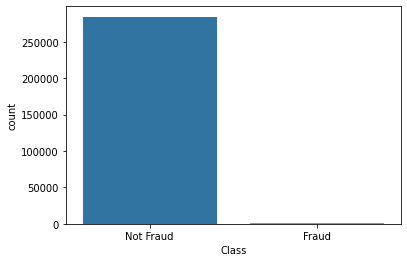

'In this dataset you can clearly see that there is a huge difference between the data set. 284315 non-fraudulent transactions and 492 fraudulent.'

In [26]:
#plot the no of 1's and 0's
g = sns.countplot(data['Class'])
g.set_xticklabels(['Not Fraud', 'Fraud'])
plt.show()
'''In this dataset you can clearly see that there is a huge difference between the data set. 284315 non-fraudulent transactions and 492 fraudulent.'''

In [27]:
#Respose and Target variable
x = data.iloc[:, :-1]
y = data.iloc[:, -1]
print(x)
print(y)

            Time         V1         V2  ...       V27       V28  Amount
0            0.0  -1.359807  -0.072781  ...  0.133558 -0.021053  149.62
1            0.0   1.191857   0.266151  ... -0.008983  0.014724    2.69
2            1.0  -1.358354  -1.340163  ... -0.055353 -0.059752  378.66
3            1.0  -0.966272  -0.185226  ...  0.062723  0.061458  123.50
4            2.0  -1.158233   0.877737  ...  0.219422  0.215153   69.99
...          ...        ...        ...  ...       ...       ...     ...
284802  172786.0 -11.881118  10.071785  ...  0.943651  0.823731    0.77
284803  172787.0  -0.732789  -0.055080  ...  0.068472 -0.053527   24.79
284804  172788.0   1.919565  -0.301254  ...  0.004455 -0.026561   67.88
284805  172788.0  -0.240440   0.530483  ...  0.108821  0.104533   10.00
284806  172792.0  -0.533413  -0.189733  ... -0.002415  0.013649  217.00

[284807 rows x 30 columns]
0         '0'
1         '0'
2         '0'
3         '0'
4         '0'
         ... 
284802    '0'
284803    

In [28]:
#Train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [29]:
#Fit the model uing Logitic Regression
model =  LogisticRegression()

model.fit(x, y)

y_predict = model.predict(x)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [30]:
accuracy_score(y_predict, y)

0.9989185659060346

In [31]:
np.unique(y_predict)

array(["'0'", "'1'"], dtype=object)

In [ ]:
''' 
The matrix trap
Using simpler metrics like accuracy score can cause misleading for the classification performance. 
In a dataset with highly unbalanced classes, the classifier will always “predict” the most common class 
without performing any analysis of the features and it will produce high accuracy rate, obviously not for the minority class.
XG Boost techniques use for imbalanced data. XGBoost (Extreme Gradient Boosting) 
is an advanced and more efficient implementation of Gradient Boosting Algorithm. 
It is 10 times faster than the normal Gradient Boosting as it implements parallel processing.
Boosting is an ensemble technique to combine weak learners to create a strong learner
that can make accurate predictions. Boosting starts out with a base classifier / weak classifier that is prepared on the training data. 
The base learners / Classifiers are weak learners i.e. the prediction accuracy is only slightly better than average. 
A classifier learning algorithm is said to be weak when small changes in data induce big changes in the classification model. 
In the next iteration, the new classifier focuses on or places more weight to those cases which were incorrectly classified in the last round. 
XG Boost is very powerful algorithm but given lots and lots of data, even XG Boost takes a long time to train.

In [32]:
#The matrix trap
# import library
from xgboost import XGBClassifier

xgb_model = XGBClassifier().fit(x_train, y_train)

# predict
xgb_y_predict = xgb_model.predict(x_test)

# accuracy score
xgb_score = accuracy_score(xgb_y_predict, y_test)

print('Accuracy score is:', xgb_score)

Accuracy score is: 0.9995786664794073


In [33]:
#confusion matrix
confusion_matrix(xgb_y_predict, y_test)

array([[56858,    18],
       [    6,    80]])

In [ ]:
'''
Resampling Technique
A widely adopted technique for dealing with highly unbalanced datasets is called resampling. 
It consists of removing samples from the majority class (under-sampling) and/or adding more examples from the minority class (over-sampling). 
In both, it can be continued until the majority and minority class are balanced out. 
Despite the advantage of balancing classes, these techniques also have their weaknesses. 
The simplest implementation of over-sampling is to duplicate random records from the minority class, which can cause overfitting and poor generalization to your test set.
In under-sampling, the simplest technique involves removing random records from the majority class, which can cause loss of information. 
Under-sampling can be a good choice when you have a ton of data -think millions of rows and Oversampling can be a good choice 
when you don’t have a ton of data to work with. 
In other words, both over-sampling and under-sampling involve introducing a bias to select more samples from one class than from another, 
to compensate for an imbalance that is either already present in the data, or likely to develop if a purely random sample were taken
A number of more sophisticated resampling techniques have been proposed in the scientific literature.
For example, we can cluster the records of the majority class, and do the under-sampling by removing records from each cluster, 
thus seeking to preserve information. In over-sampling, instead of creating exact copies of the minority class records, 
we can introduce small variations into those copies, creating more diverse synthetic samples.
In next we apply some of these resampling techniques, using the Python library imbalanced-learn. 
It is compatible with scikit-learn and is part of scikit-learn-contrib projects.
Let’s implement this with the credit card fraud detection example.'''

In [ ]:
''' 
Random under-sampling with imblearn
RandomUnderSampler is a fast and easy way to balance the data by randomly selecting a subset of data for the targeted classes. 
Under-sample the majority class(es) by randomly picking samples with or without replacement.
'''

original dataset shape: Counter({"'0'": 284315, "'1'": 492})
Resample dataset shape Counter({"'0'": 492, "'1'": 492})


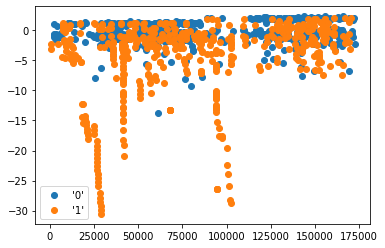

Resample dataset shape Counter({"'0'": 492, "'1'": 492})


In [34]:
# Random under-sampling with imblearn
import imblearn
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)
# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(x, y)

print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_rus))

from numpy import where
counter=Counter(y)
for label, _ in counter.items():
  row_ix = where (y_rus == label)[0]
  plt.scatter(x_rus[row_ix, 0], x_rus[row_ix, 1], label=str(label))
plt.legend()
plt.show()
print('Resample dataset shape', Counter(y_rus))

In [ ]:
'''
Random over-sampling with imblearn
One way to fight imbalance data is to generate new samples in the minority classes. 
The most naive strategy is to generate new samples by randomly sampling with replacement of the currently available samples. 
The RandomOverSampler offers such a scheme.

'''

Original dataset shape Counter({"'0'": 284315, "'1'": 492})
Resample dataset shape Counter({"'0'": 284315, "'1'": 284315})


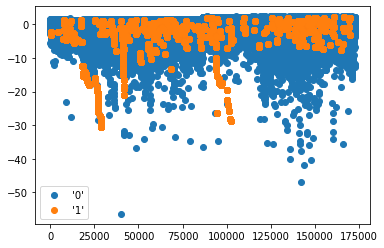

In [35]:
# Random over-sampling with imblearn
import imblearn
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

# fit predictor and target varaible
x_ros, y_ros = ros.fit_resample(x, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

# scatter plot of examples by class label
from numpy import where
counter=Counter(y)
for label, _ in counter.items():
  row_ix = where (y_ros == label)[0]
  plt.scatter(x_ros[row_ix, 0], x_ros[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [ ]:
'''
Synthetic Minority Oversampling Technique (SMOTE)
This technique generates synthetic data for the minority class.
SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. 
The synthetic points are added between the chosen point and its neighbors.
SMOTE algorithm works in 4 simple steps:
1.	Choose a minority class as the input vector
2.	Find its k nearest neighbors (k_neighbors is specified as an argument in the SMOTE() function)
3.	Choose one of these neighbors and place a synthetic point anywhere on the line joining the point under consideration and its chosen neighbor
4.	Repeat the steps until data is balanced
A scatter plot of the transformed dataset can also be created and we would expect to see many more examples for the minority class on lines between 
the original examples in the minority class.

'''

Original dataset shape Counter({"'0'": 284315, "'1'": 492})
Resample dataset shape Counter({"'0'": 284315, "'1'": 284315})


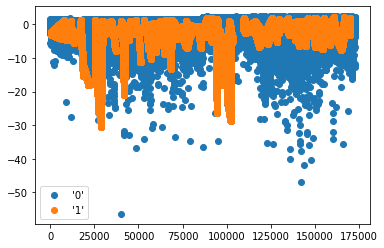

In [36]:
#Synthetic Minority Oversampling Technique (SMOTE)
# import library
from imblearn.over_sampling import SMOTE

# fit predictor and target variable (transform the dataset)
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

# scatter plot of examples by class label
from numpy import where
counter=Counter(y)
for label, _ in counter.items():
  row_ix = where (y_smote == label)[0]
  plt.scatter(x_smote[row_ix, 0], x_smote[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [ ]:
'''
NearMiss is an under-sampling technique. Instead of resampling the Minority class, using a distance, this will make the majority class equal to the minority class.
'''

Original dataset shape: Counter({"'0'": 284315, "'1'": 492})
Resample dataset shape: Counter({"'0'": 492, "'1'": 492})


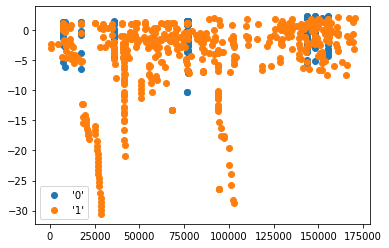

In [37]:
# NearMiss
from imblearn.under_sampling import NearMiss

nm = NearMiss()

x_nm, y_nm = nm.fit_resample(x, y)

print('Original dataset shape:', Counter(y))
print('Resample dataset shape:', Counter(y_nm))

# scatter plot of examples by class label
from numpy import where
counter=Counter(y)
for label, _ in counter.items():
	row_ix = where (y_nm == label)[0]
	plt.scatter(x_nm[row_ix, 0], x_nm[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [ ]:
'''
A combination of under- and oversampling method using pipeline
Another suggestion is to combining SMOTE with random undersampling of the majority class.
The imbalanced-learn library supports random undersampling via the RandomUnderSampler class.
We can update the example to first oversample the minority class to have 10 percent the number of examples of the majority class, 
then use random undersampling to reduce the number of examples in the majority class to have 50 percent more than the minority class.
To implement this, we can specify the desired ratios as arguments to the SMOTE and RandomUnderSampler classes. We can then chain these two transforms together 
into a Pipeline.
The Pipeline can then be applied to a dataset, performing each transformation in turn and returning a final dataset with 
the accumulation of the transform applied to it, in this case oversampling followed by undersampling.
The pipeline can then be fit and applied to our dataset just like a single transform and we can then summarize and plot the resulting dataset.
We would expect some SMOTE oversampling of the minority class, although not as much as before where the dataset was balanced. 
We also expect fewer examples in the majority class via random undersampling.

'''

Counter({"'0'": 284315, "'1'": 492})
Counter({"'0'": 56862, "'1'": 28431})


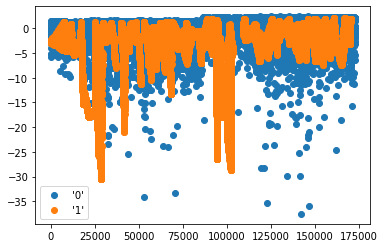

In [38]:
# define pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from numpy import where

# summarize class distribution
counter = Counter(y)
print(counter)

# define pipeline
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X, y = pipeline.fit_resample(x, y)


# summarize the new class distribution
counter = Counter(y)
print(counter)

# scatter plot of examples by class label
from numpy import where
counter=Counter(y)
for label, _ in counter.items():
  row_ix = where (y == label)[0]
  plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [ ]:
'''
##Advantage and disadvantages of Resampling

Advantage and disadvantages of Under-sampling
Advantages
•	It can help improve run time and storage problems by reducing the number of training data samples when the training data set is huge.
Disadvantages
•	It can discard potentially useful information which could be important for building rule classifiers.
•	The sample chosen by random under-sampling may be a biased sample. And it will not be an accurate representation of the population. Thereby, resulting in inaccurate results with the actual test data set.

Advantages and Disadvantage of Over-sampling
Advantages
•	Unlike under-sampling, this method leads to no information loss.
•	Outperforms under sampling
Disadvantages
•	It increases the likelihood of overfitting since it replicates the minority class events.

'''

In [ ]:
'''
##Change the performance metric
Accuracy is not the best metric to use when evaluating imbalanced datasets as it can be misleading.
Metrics that can provide better insight are:
•	Confusion Matrix: a table showing correct predictions and types of incorrect predictions.
•	Precision: the number of true positives divided by all positive predictions. Precision is also called Positive Predictive Value. 
It is a measure of a classifier’s exactness. Low precision indicates a high number of false positives.
•	Recall: the number of true positives divided by the number of positive values in the test data. The recall is also called Sensitivity or the True Positive Rate. 
It is a measure of a classifier’s completeness. Low recall indicates a high number of false negatives.
•	F1: Score: the weighted average of precision and recall.
•	Area Under ROC Curve (AURO C): AUROC represents the likelihood of your model distinguishing observations from two classes.

'''

In [ ]:
'''
##Conclusion
To summarize, in this article, we have seen various techniques to handle the class imbalance in a dataset. 
There are actually many methods to try when dealing with imbalanced data. However, there is no short answer to the question if an undersampling or oversampling method is better for imbalanced data, even more so on 
when it comes to which exact sampling technique (random or SMOTE) to use. 
The common argument is that undersampling is generally “cheaper” than oversampling and since the class of interest is the minority positive class, reducing some 
information of the majority negative class is acceptable. But there is no guarantee that the same can always be replicated in your case.

'''

In [ ]:
'''
##References
1)	https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
2)	https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/
3)	https://towardsdatascience.com/how-to-deal-with-imbalanced-data-in-python

'''